In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from preprocess import GSE
from models import *

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/sklearn/utils/linear_assignment_.py:21: DeprecationWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)


In [2]:
dataset = GSE()
X_train, y_train = dataset.train
X_test, y_test = dataset.test

In [3]:
model = AutoEncoder(original_dim=dataset.n_genes)

In [4]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=20)
plot_latent = PlotLatentSpace(model, X_train, y_train, interval=10)
model.compile(optimizer=Adam(0.0001), loss=model.reconstruction_loss)
history = model.fit(X_train, X_train, epochs=1000, validation_data=(X_test, X_test),
                   callbacks=[early_stopping, plot_latent])

Train on 322 samples, validate on 108 samples
Epoch 1/1000
320/322 [============================>.] - ETA: 0s - loss: 3966.2618WARNING:tensorflow:Layer Encoder is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

322/322 [==============================] - 4s 13ms/sample - loss: 3964.2266 - val_loss: 3669.3948
Epoch 2/1000
322/322 [==============================] - 0s 752us

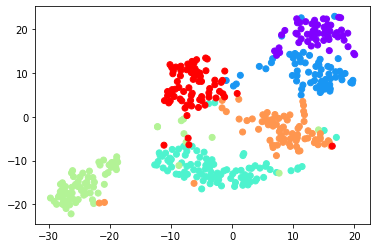

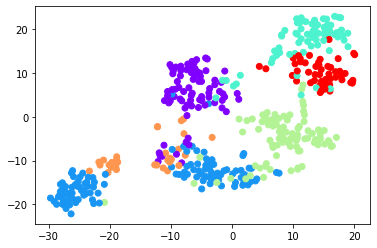

In [6]:
gmm = GaussianMixture(n_components=6)
z = model.encode(dataset.data_scaled)
cluster = gmm.fit_predict(z)
z_tsne = TSNE().fit_transform(z)
plt.scatter(z_tsne[:, 0], z_tsne[:, 1], c=dataset.tumor_labels, cmap='rainbow')
plt.figure()
plt.scatter(z_tsne[:, 0], z_tsne[:, 1], c=cluster, cmap='rainbow')

In [8]:
acc = ComputeAccuracy(model, dataset.data_scaled, dataset.tumor_labels)

In [10]:
acc, _ = acc.compute_accuracy(dataset.tumor_labels, cluster)

In [11]:
acc

71.86046511627907